In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Read pipe-separated file
df = pd.read_csv("../data/insurance.txt", sep="|")

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Strip whitespace from string columns (optional, but often useful)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Check columns and first few rows
print(df.columns.tolist())
print(df.head())



C:\Users\blien\AppData\Local\Temp\ipykernel_18268\2827124345.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/insurance.txt", sep="|")


['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [13]:
df.columns = df.columns.str.lower()  # lowercase all column names

cat_cols = [
    "isvatregistered","citizenship","legaltype","title","language",
    "bank","accounttype","maritalstatus","gender","country","province",
    "postalcode","maincrestazone","subcrestazone","itemtype","vehicletype",
    "make","model","bodytype","numberofdoors","newvehicle","crossborder",
    "covercategory","covertype","covergroup","section","product",
    "statutoryclass","statutoryrisktype"
]

# Convert to category
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

df["transactionmonth"] = pd.to_datetime(df["transactionmonth"])

# Check
print(df[cat_cols].dtypes)
print(df.head())


isvatregistered      category
citizenship          category
legaltype            category
title                category
language             category
bank                 category
accounttype          category
maritalstatus        category
gender               category
country              category
province             category
postalcode           category
maincrestazone       category
subcrestazone        category
itemtype             category
vehicletype          category
make                 category
model                category
bodytype             category
numberofdoors        category
newvehicle           category
crossborder          category
covercategory        category
covertype            category
covergroup           category
section              category
product              category
statutoryclass       category
statutoryrisktype    category
dtype: object
   underwrittencoverid  policyid transactionmonth isvatregistered citizenship  \
0               145249     12827   

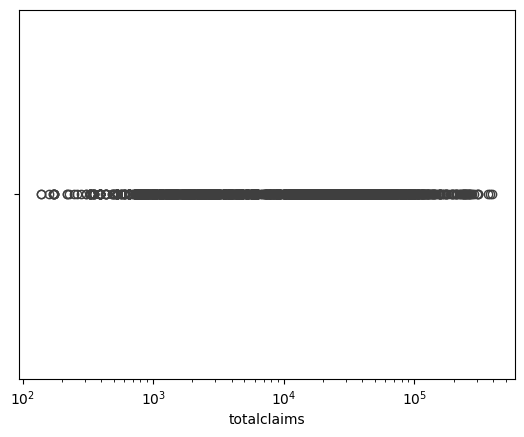

In [15]:
df.columns = df.columns.str.lower()
sns.boxplot(x=df["totalclaims"])  # now all lowercase
plt.xscale("log")
plt.show()


In [16]:
# Standardize column names to lowercase
df.columns = df.columns.str.lower()

# Calculate LossRatio
df["lossratio"] = df["totalclaims"] / df["totalpremium"]

# Overall loss ratio
overall_loss_ratio = df["lossratio"].mean()
print("Overall Loss Ratio:", overall_loss_ratio)

# Loss ratio by Province
loss_by_prov = df.groupby("province").agg(
    claims=("totalclaims", "sum"),
    premium=("totalpremium", "sum")
)
loss_by_prov["lossratio"] = loss_by_prov["claims"] / loss_by_prov["premium"]
loss_by_prov = loss_by_prov.sort_values("lossratio", ascending=False)
print(loss_by_prov)

# Loss ratio by Gender
loss_by_gender = df.groupby("gender").agg(
    claims=("totalclaims", "sum"),
    premium=("totalpremium", "sum")
)
loss_by_gender["lossratio"] = loss_by_gender["claims"] / loss_by_gender["premium"]
print(loss_by_gender)

# Loss ratio by VehicleType
loss_by_vehicle = df.groupby("vehicletype").agg(
    claims=("totalclaims", "sum"),
    premium=("totalpremium", "sum")
)
loss_by_vehicle["lossratio"] = loss_by_vehicle["claims"] / loss_by_vehicle["premium"]
loss_by_vehicle = loss_by_vehicle.sort_values("lossratio", ascending=False)
print(loss_by_vehicle)


c:\Users\blien\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\blien\AppData\Local\Temp\ipykernel_18268\2512889960.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_by_prov = df.groupby("province").agg(
C:\Users\blien\AppData\Local\Temp\ipykernel_18268\2512889960.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_by_gender = df.groupby("gender").agg(
C:\Users\blien\AppData\Local\Temp\ipykernel_18268\2512889960.py:29: FutureWarning: Th

Overall Loss Ratio: nan
                     claims       premium  lossratio
province                                            
Gauteng        2.939415e+07  2.405377e+07   1.222018
KwaZulu-Natal  1.430138e+07  1.320908e+07   1.082693
Western Cape   1.038977e+07  9.806559e+06   1.059472
North West     5.920250e+06  7.490508e+06   0.790367
Mpumalanga     2.044675e+06  2.836292e+06   0.720897
Free State     3.549223e+05  5.213632e+05   0.680758
Limpopo        1.016477e+06  1.537324e+06   0.661199
Eastern Cape   1.356427e+06  2.140104e+06   0.633813
Northern Cape  8.949051e+04  3.165581e+05   0.282699
                     claims       premium  lossratio
gender                                              
Female         2.502461e+05  3.044806e+05   0.821879
Male           1.396704e+06  1.580143e+06   0.883910
Not specified  6.271410e+07  5.920275e+07   1.059311
                         claims       premium  lossratio
vehicletype                                             
Heavy Commerci

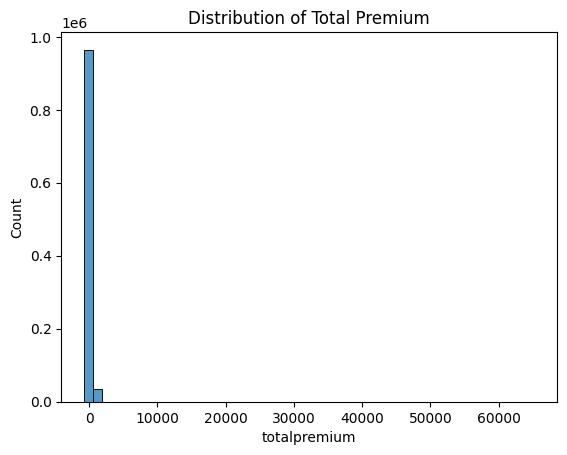

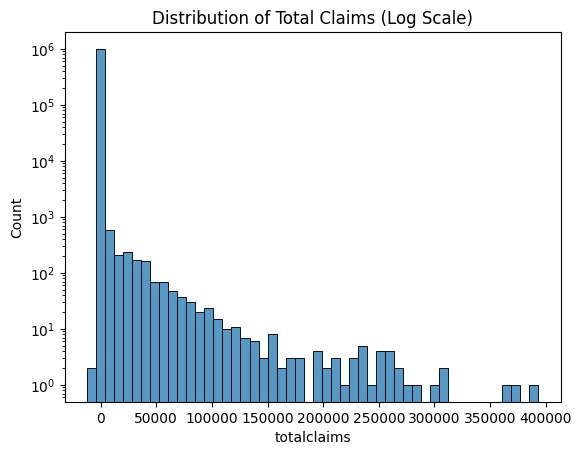

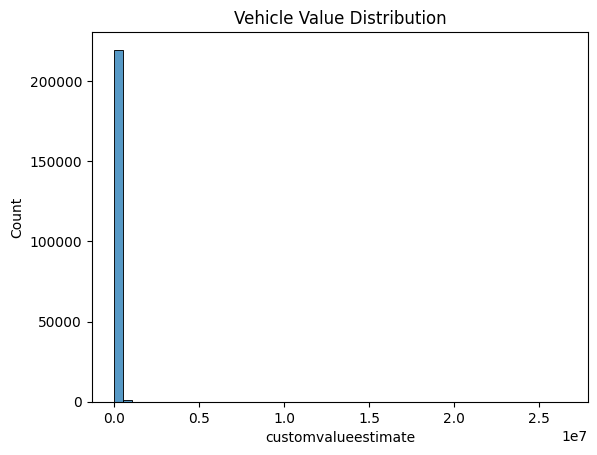

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize column names to lowercase (if not already done)
df.columns = df.columns.str.lower()

# Plot Total Premium
sns.histplot(df["totalpremium"], bins=50)
plt.title("Distribution of Total Premium")
plt.show()

# Plot Total Claims with log scale
sns.histplot(df["totalclaims"], bins=50)
plt.yscale("log")
plt.title("Distribution of Total Claims (Log Scale)")
plt.show()

# Plot Vehicle Custom Value Estimate
sns.histplot(df["customvalueestimate"], bins=50)
plt.title("Vehicle Value Distribution")
plt.show()


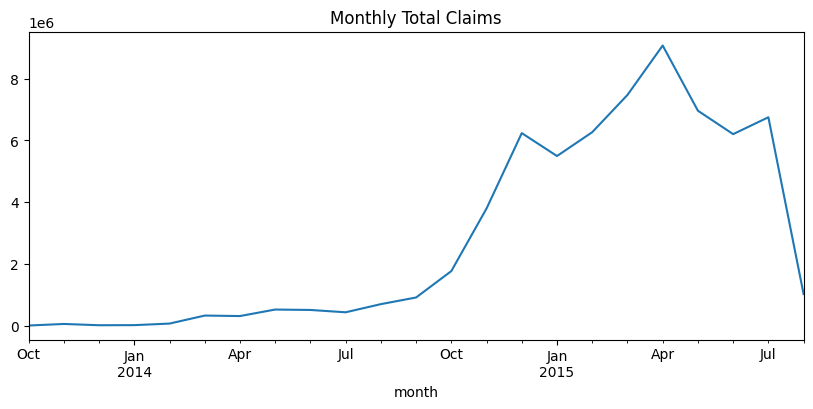

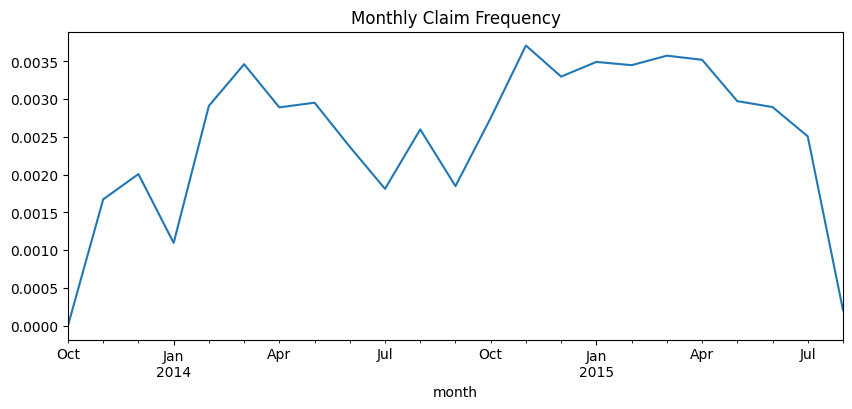

In [19]:
# Ensure columns are lowercase
df.columns = df.columns.str.lower()

# Create a month period column
df["month"] = df["transactionmonth"].dt.to_period("M")

# Monthly total claims
monthly = df.groupby("month")["totalclaims"].sum()
monthly.plot(kind="line", figsize=(10, 4), title="Monthly Total Claims")
plt.show()

# Monthly claim frequency
df["hasclaim"] = df["totalclaims"] > 0
freq = df.groupby("month")["hasclaim"].mean()
freq.plot(kind="line", figsize=(10, 4), title="Monthly Claim Frequency")
plt.show()


C:\Users\blien\AppData\Local\Temp\ipykernel_18268\1034965818.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle = df.groupby("make").agg(


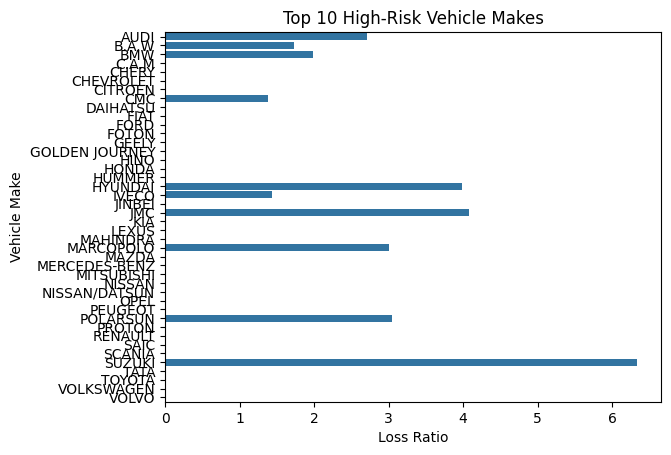

In [20]:
# Group by vehicle make
vehicle = df.groupby("make").agg(
    claims=("totalclaims", "sum"),
    premium=("totalpremium", "sum")
)

# Calculate loss ratio
vehicle["lossratio"] = vehicle["claims"] / vehicle["premium"]

# Top 10 high-risk vehicles
top = vehicle.sort_values("lossratio", ascending=False).head(10)

# Plot
sns.barplot(x=top["lossratio"], y=top.index)
plt.title("Top 10 High-Risk Vehicle Makes")
plt.xlabel("Loss Ratio")
plt.ylabel("Vehicle Make")
plt.show()


In [ ]:
numeric_cols = ["TotalPremium","TotalClaims","CustomValueEstimate","Kilowatts","Cubiccapacity"]
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.show()
sns.scatterplot(x="TotalPremium", y="TotalClaims", data=df)
plt.title("Premium vs Claims")
plt.show()


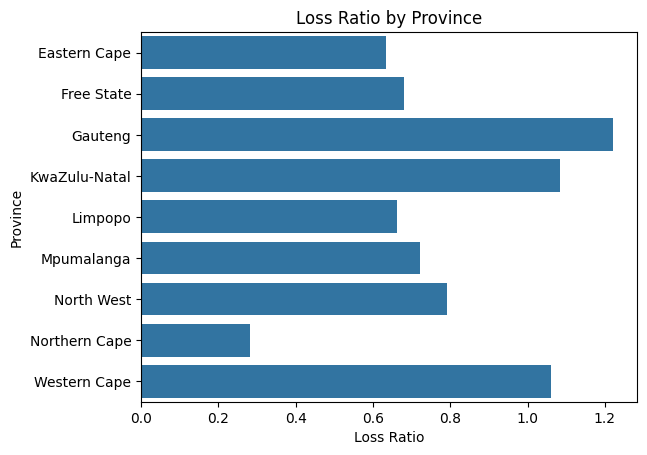

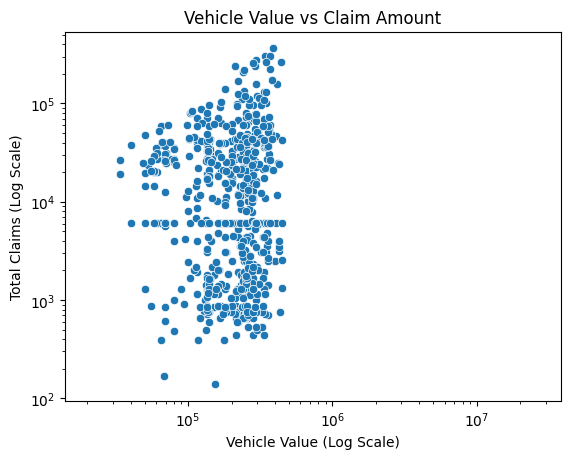

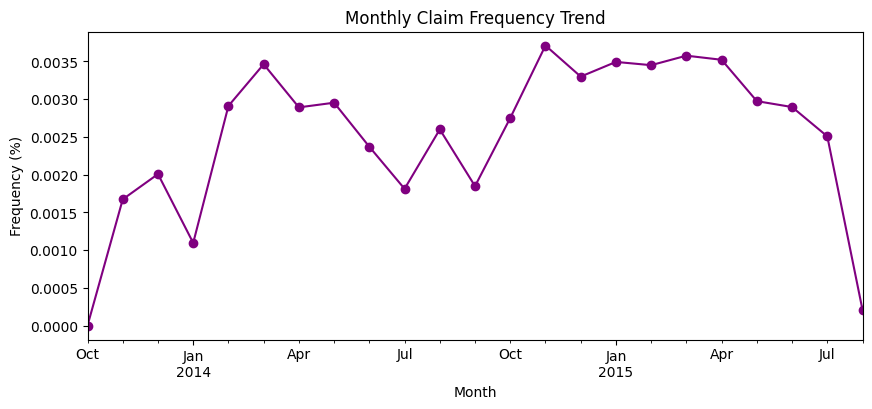

In [21]:
# Loss ratio by province
sns.barplot(data=loss_by_prov.reset_index(), x="lossratio", y="province")
plt.title("Loss Ratio by Province")
plt.xlabel("Loss Ratio")
plt.ylabel("Province")
plt.show()

# Vehicle value vs claim amount (log-log scale)
sns.scatterplot(data=df, x="customvalueestimate", y="totalclaims")
plt.xscale("log")
plt.yscale("log")
plt.title("Vehicle Value vs Claim Amount")
plt.xlabel("Vehicle Value (Log Scale)")
plt.ylabel("Total Claims (Log Scale)")
plt.show()

# Monthly claim frequency trend
freq.plot(kind="line", marker="o", figsize=(10,4), color="purple")
plt.title("Monthly Claim Frequency Trend")
plt.ylabel("Frequency (%)")
plt.xlabel("Month")
plt.show()


In [22]:
# Calculate IQR for total claims
Q1 = df['totalclaims'].quantile(0.25)
Q3 = df['totalclaims'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['totalclaims'] < Q1 - 1.5*IQR) | (df['totalclaims'] > Q3 + 1.5*IQR)]

# Number of outliers
len(outliers)


2793